Import libraries numpy and matplotlib.pyplot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Import functions from functions folder

In [2]:
from Functions.KMeans import split_channels
from Functions.KMeans import init_centroids
from Functions.KMeans import euclidean_distance_3d
from Functions.KMeans import assign_to_centroids
from Functions.KMeans import update_centroids

Load and save images
Show image as test 

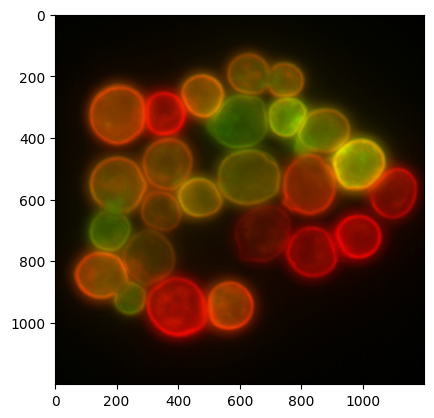

In [3]:
YeastCells = np.copy(plt.imread('Original_Images/Clustering/Data/Yeast_Cells.jpg'))
plt.imshow(YeastCells)

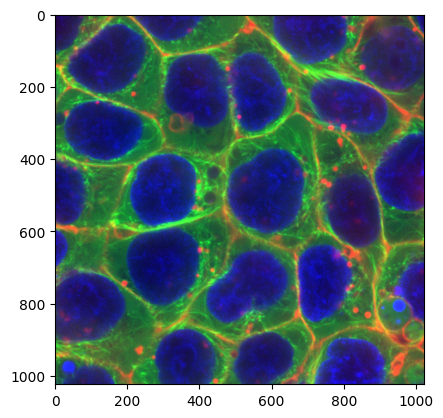

In [4]:
CellNuclei = np.copy(plt.imread('Original_Images/Clustering/Data/Cell_Nuclei.tif'))
plt.imshow(CellNuclei)

Test if loading split_channels worked

In [5]:
R, G, B = split_channels(YeastCells)

R

array([2, 2, 5, ..., 2, 2, 1], shape=(1440000,), dtype=uint8)

Pick k random centroids

In [6]:
centroids = init_centroids(5)
centroids


array([[0.88142224, 0.05153361, 0.12225557],
       [0.41947597, 0.20266457, 0.36034694],
       [0.43329431, 0.46293408, 0.47493468],
       [0.86400574, 0.24351382, 0.17106753],
       [0.62322044, 0.88346821, 0.45778154]])

Euclidean distance test

In [7]:
euclidean_distance_3d(centroids[1,],[5,])

euclidean_distance_3d([0,0,0], [0,1,0])

np.float64(1.0)

In [8]:
pixels = CellNuclei.reshape(-1, 3)
assign_to_centroids(pixels, centroids)

array([4, 4, 4, ..., 4, 4, 4], shape=(1048576,))

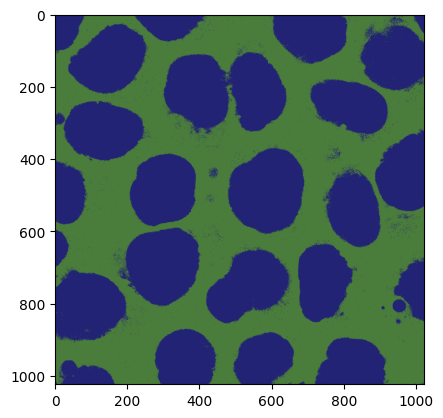

In [11]:
def kmeans_clustering(image, k, max_iterations=100):
    """
    Perform K-means clustering on a 3D image.

    Parameters:
    - image: 3D numpy array representing the image.
    - k: Number of clusters.
    - max_iterations: Maximum number of iterations for convergence.

    Returns:
    - segmented_image: 3D numpy array with clustered pixel values.
    """
    # Reshape Image
    reshaped_image = image.reshape(-1, 3)

    # Initialize centroids
    centroids = init_centroids(k)

    for _ in range(max_iterations):
        # Assign pixels to the nearest centroid
        labels = assign_to_centroids(reshaped_image, centroids)

        # Update centroids based on the assigned pixels
        new_centroids = update_centroids(reshaped_image, labels, k)

        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    # Create segmented image based on final labels
    labels_2d = labels.reshape(image.shape[0], image.shape[1])
    segmented_image = np.zeros_like(image)
    for i in range(k):
        segmented_image[labels_2d == i] = centroids[i]

    return segmented_image

clustered_CellNuclei = kmeans_clustering(CellNuclei, 2, max_iterations=10)

plt.imshow(clustered_CellNuclei)